# Basic usage

## Imports

- `pnut`: process neutrino underground telemetry.
- `beer`: back-end event reader.
- `Supernova`: simulation and progenitor specifics.
- `Detector`: detector specifics.

In [19]:
from sspike import pnut, beer
from sspike.supernova import Supernova
from sspike.detectors import Detector

## Supernova parameters

- `model`: current options are `Nakazato_2013`, `Tamborra_2014`.  Others available soon?
- `progenitor`: see notebooks or documentation for specifics on each model and references.
- `transformation`: snewpy transformation type.  Tested for `NoTransformation`.  Others available soon?
- `distance`: distance to supernova in kpc.

In [20]:
model = 'Nakazato_2013'
progenitor = {'mass': 20,
              'metal': 0.02,
              't_rev': 300}
transformation = 'NoTransformation'
distance = 10.0

## Initialize classes

- `Detector` must be in `SNOwGLoBES` and `snewpy`.

In [21]:
detector = Detector('kamland')
sn = Supernova(model, progenitor, transformation, distance)

## Luminosity

Get luminosity as a pandas DataFrame with `pnut` or plot with `beer`.

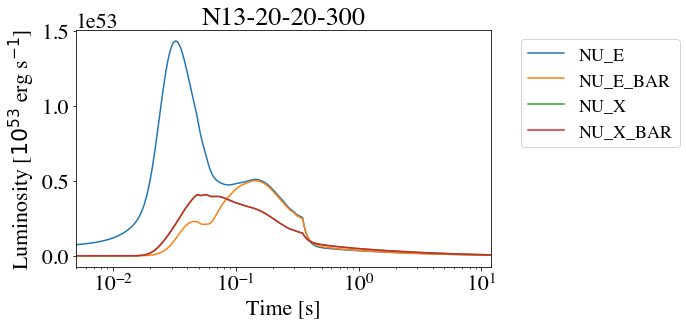

In [22]:
# lum = pnut.get_luminosities(sn)
beer.plot_luminosities(sn)

## Fluences

Get model fluxes scaled by distance and integrated over time.

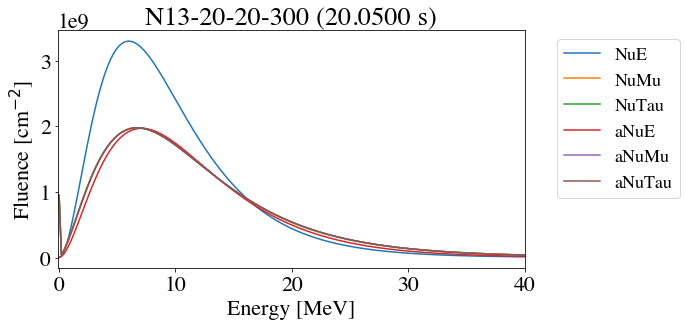

In [23]:
# fluences = pnut.get_fluences(sn)
beer.plot_fluences(sn)

## SNOwGLoBES processing

Use `snewpy` to run simulation fluences in `SNOwGLoBES`.

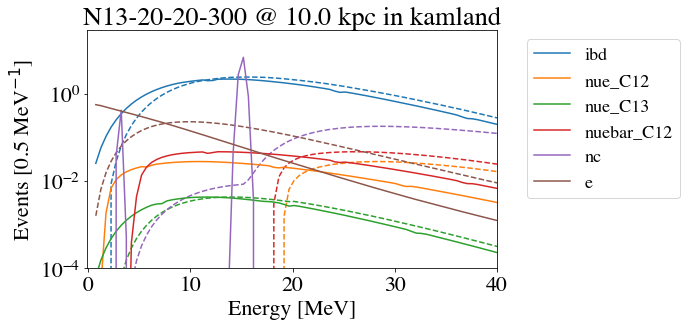

In [24]:
snow_events = pnut.snowglobes_events(sn, detector)
beer.plot_snowglobes_events(sn, detector)

## sspike processing

Use fluences from `snewpy` to determine proton-neutrino elastic-scattering rates in `kamland`.

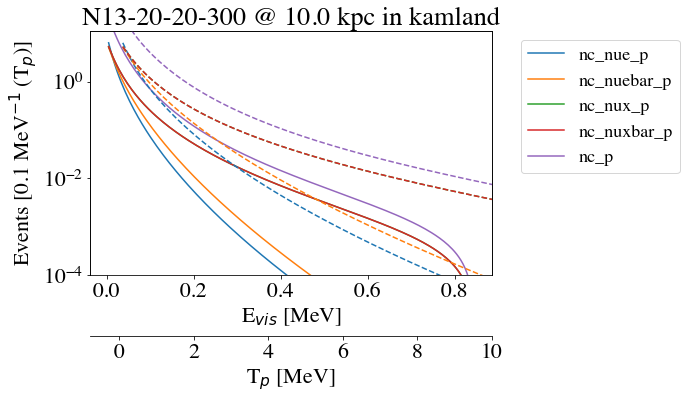

In [25]:
sspike_events = pnut.sspike_events(sn, detector)
beer.plot_sspike_events(sn, detector)

## Event totals

Sum events by interaction channel.  Event types to process are set by `Detector`.

In [26]:
# totals = pnut.event_totals(sn, detector)
beer.bar_totals(sn, detector)

## Visible totals

Sub-set of all totals set by `Detector`.

### Bar graph

In [27]:
vis = pnut.vis_totals(sn, detector)
beer.bar_vis(sn, detector)

### DataFrame

Extra keys for comparing simulations.

In [28]:
vis

,model,mass,metal,t_rev,channel,events
0,Nakazato_2013,20,0.02,300,ibd,90.400511
1,Nakazato_2013,20,0.02,300,nue_C12,1.279816
2,Nakazato_2013,20,0.02,300,nue_C13,0.163539
3,Nakazato_2013,20,0.02,300,nuebar_C12,2.118525
4,Nakazato_2013,20,0.02,300,nc,10.867213
5,Nakazato_2013,20,0.02,300,e,7.759577
6,Nakazato_2013,20,0.02,300,nc_p,2.276566


## Rates by distance

Scale visible totals from 100 pc to 100 kpc.

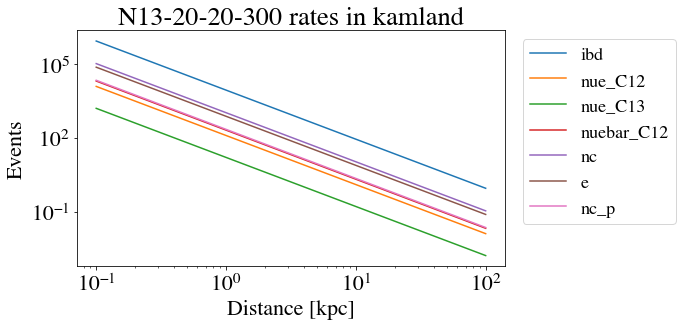

In [29]:
beer.plot_distance_rates(sn, detector)